In [3]:
# Restart the kernel and run this cell before you start
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from initialize import *

# TN2513 Lecture 3: Integration

In this lecture notebook, you will implement the different techniques for the numerical computation of integrals in python and explore aspects of numerical integration.

The reading material for this Lab is sections 5.1 and 5.2 from "Computation Physics (Revised and Expanded)" 2013 edition by Mark Newman (ISBN 978-148014551-1).

**Learning objectives:** After finishing this notebook, you should be able to:

1. Implement integration of a function with the trapezoidal rule
2. Implement integration of a function with Simpson's rule
3. Calculate the integral of a numerical dataset

We will start by calculating the following integral: 

\begin{equation}
\int_0^2 (x^4 - 2x +1) dx
\end{equation}

using two different techniques. 

This integral, discussed on page 143 of the book, is actually one that you can calculate yourself and has the exact value of 4.4. This will be handy as we can use this exact value to compare with the values that our numerical calculations give. 

(The idea, of course though, is that numerical integration is useful for calculating the integrals of functions that are not easy to calculate! But we will do this later, and for now, it is handy to know what the answer is.) 

Before we start, it is useful already to make a plot of the function we are integrating. 

To do this, we will create an array x ranging from 0 to 2 with 100 points (just to get a bit of a smooth plot). We will then create second array y which will be our integrand, and then we will plot y versus x.

### Task 1

Modify the code below to produce a plot of the integrand in the range of -2 to 2 with 100 points.

In [4]:
# Your code

def f(x):
    return x**4 - 2*x + 1

# First, make the arrays of x and y values for the plot
npts = ______
x = np.linspace(____,____,npts)
y = _____

# Now plot it and add x and y labels

plt.plot(___,___)
plt.
plt.

# An zero axis line is handy. "ls" is a shortcut for "linestyle" and "lw" is a shortcut for "linewidth"

plt.axhline(0,color='grey', linestyle=':')
plt.show()

SyntaxError: invalid syntax (<ipython-input-4-7ca8998a249a>, line 14)

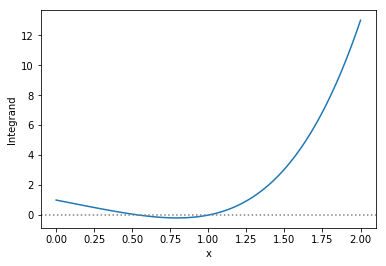

In [5]:
#solutions

def f(x):
    return x**4 - 2*x + 1

# First, make the arrays of x and y values for the plot
npts = 100
x = np.linspace(0,2,npts)
y = f(x)

# Now plot it

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("Integrand")

# An zero axis line is handy. "ls" is a shortcut for "linestyle" and "lw" is a shortcut for "linewidth"

plt.axhline(0,color='grey', linestyle=':')
plt.show()

Self grading:

* Does your plot have axis labels?
* Does the function look reasonably like you might think?

The function looks pretty reasonable: it starts going down, it crosses through zero, and then shoots up. It has some "positive" area above the x-axis, and in the middle, it has a little bit of "negative" area that decreases the value of the integral.

## The Trapezoidal Rule

A simple method of calculating an integral is using the trapezoidal rule, outlined in the book in section 5.1.1. 

Here, we will implement code to calculate our integral aboe using the trapezoidal rule. 

### Task 2
Copy the code from example 5.1 of the textbook into the cell below and use it to calculate the integral with N = 10 slices. 

In [6]:
# Your code



In [7]:
#solutions

# The number of points, and the starting and end points
N = 10
a = 0.0
b = 2.0

# The step size
h = (b-a)/N

# s is our running sum
s = 0.5*f(a) + 0.5*f(b)
for k in range(1,N):
    s += f(a+k*h)

# The integral is then given by h*s
answer2 = (h*s)



Using the code, you can play with $N$ to see how many slices we need to get a reasonable accuracy. 

### Task 3

Find a value of $N$ you need to get the correct answer to <a href=https://en.wikipedia.org/wiki/Approximation_error#Formal_Definition>relative error</a> of less than $10^{-6}$ = one part per million (ppm).

The definition of relative error is as follows: if $v$ is the correct answer and $v_{\rm approx}$ is the approximate answer, the relative error $\eta$ is defined as:

\begin{equation}
\eta = \left| \frac{v - v_{\rm approx}}{v} \right|
\end{equation}

In [24]:
#solutions

def f(x):
    return x**4 - 2*x + 1

N = 1557
#N = _______
a = 0.0
b = 2.0
h = (b-a)/N

s = 0.5*f(a) + 0.5*f(b)
for k in range(1,N):
    s += f(a+k*h)
    
integral = h*s
eta = (integral - 4.4)/4.4
print("N = %d: Integral is %f Relative error %e" % (N, integral, eta))
answer3 = N

N = 1557: Integral is 4.400004 Relative error 9.999972e-07


## Simpson's Rule

Simpson's rule is a numerical integration technique that replaces the linear approximation of the integrand in the trapizoidal technique witha a "best estimate" quadratic approximation. The technique is explained in detail in section 5.1.2 of the texbook.

### Task 4

Write code to implement Simpson's rule for the integral in section 1.1 using 10 slices. 

In [ ]:
# Your code



In [7]:
#solutions

# Write your Simpson's rule code here

def f(x):
    return x**4 - 2*x + 1

N = 10
a = 0.0
b = 2.0
h = (b-a)/N

# Our running sum (we'll multiply by h/3 at the end)
s = f(a) + f(b)

# First the odd terms
for k in range(1,N,2):
    s += 4*f(a+k*h)

# Now the even terms
for k in range(2,N,2):
    s += 2*f(a+k*h)

# The answer is then the sum*h/3
answer3 = s*h/3.0
print("Integral with Simpson's rule is %f" % answer3)

Integral with Simpson's rule is 4.400427


Which technique is more accurate for the same number of slices?

## Integrating numerical data

In the above, we have focussed on integrating analytical functions. However, the same techniques we have introduced can also be used to integrate numerical data. 

One difference, however, is that we will not evaluate the values of the integrand by a function call, as we did above, but instead by looking up it's value in an array. Also, since the data we read in is already "discretized" into steps, there is not really a need to think about the number of slices: the data is already naturally sliced up for us.

This is explored in Exercise 5.1 of the textbook. For this you will need to download the file `velocities.txt` from the online resources website of the textbook:

http://www-personal.umich.edu/~mejn/cp/data/velocities.txt


If you are fancy, you can do this directly using the `urllib` library in python: 

```
# Download the resource files.
import urllib
urllib.request.urlretrieve("http://www-personal.umich.edu/~mejn/cp/data/velocities.txt", 
                           filename="velocities.txt")
```

The file contains two columns of numbers, the first representing time $t$ in seconds and the second the $x$-velocity in meters per second of a particle, measured once every second from time $t=0$ to $t=100$ seconds.

### Task 5

Read in the data and, using the trapezoidal rule, calculate from them the approximate distance traveled by the particle in the $x$ direction as a function of time.  See Section 2.4.3 on page 57 of the textbook if you want a reminder of how to read data from a file.

_Hint_ This is a cumulative integral, a bit different than the definite integrals handled above. 

_Recommendation_ "Modularize" your code by creating a function that does the trapezoidal intergration of an array, this will make your code easier to write and use. 

_Tip_ If you want your code to run fast (not so important here, but could become important for bigger calculations), you can also use `np.sum()` to calculate your sums instead of using a `for` loop.

In [ ]:
# Your code



In [8]:
#solutions

# Download the resource files.
import urllib
urllib.request.urlretrieve("http://www-personal.umich.edu/~mejn/cp/data/velocities.txt", 
                           filename="velocities.txt")

# Load the data
data= np.loadtxt("velocities.txt")
t = data[:,0]
v = data[:,1]

# The number of points in the array we read in
N = len(v)

# It is specified that the time step is constant and is 1 second. (We could check this by checking if the
# time data is a straight line, but I will trust the author.)
h = 1

# Our desired output is not just the total distance travelled, but actually an 
# array that shows the distance as a function of time. This is a bit different
# to what we've been doing above since we will be calculating a _cumulative_ integral

# The output array of distance vs. time
d = np.empty(N)

# There may be a numpy cumulative integral function (google would tell us quickly), but we'll
# implement it ourselves here with a for loop.

# n will be the last point of our cumulative integral. range(len(v)) will give a range list 
# running from 0 to N-1 (v[N-1] being the last element in array v) 

# It will be handy to have a function that calculates the integral of an array 
def trapezoid(x):
    N = len(x)
    s = (x[0]+x[1])/2 
    s += np.sum(x[1:N]) # It's not obvious, but this even works for N = 1
    return s*h

# Note that it does not make sense to calculate the integral for the first point, since in zero 
# time, no distance has been travelled. 
d[0] = 0

# Note it's not obvious that range() shoud start at two, but you must remember that v[0:2] 
# gives an array [v[0], v[1]]
for i in range(2,N):
    d[i] = trapezoid(v[0:i])

answer5 = d

In [9]:
check_answer_task5(answer5)

Your answer is correct


### Task 6

Make a plot with velocity on the left-hand y-axis and distance travelled in the right-hand y-axis. 

To plot data with a second y-axis, you need a bit more matplotlib code:

```
# First, initialize your plot with the plt.subplots() command, which returns an axis object you will need
fig, ax1 = plt.subplots()

# You then use the twinx() function to make a second axis object with it's x-axis linked to the original x-axis
ax2 = ax1.twinx()

# Now you can use the plot() commands of each axis objects: ax.plot(...). 
ax1.plot(t,d, 'g-', label="d")
ax1.set_ylabel("my axis (my units)", color='g')
ax2.plot(...)
```

You can also use the `axhline()` command to add horizontal lines. For example, this will add a grey dashed horizontal line:

```
ax2.axhline(0, color='grey', linestyle=":")
```


In [ ]:
# Your code



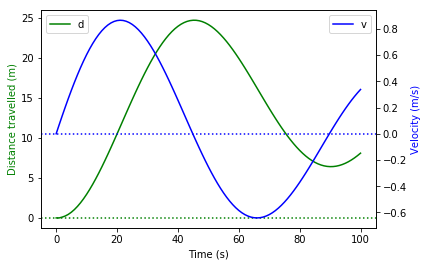

In [24]:
#solutions

# To make a second axis, we need to use the subplots() command to get access to the 
# "axis" object variable of our plot
fig, ax1 = plt.subplots()

# Once we have it, we can use the twinx() function to make a second y axis
ax2 = ax1.twinx()

# And now we use plot commands associated with the two axis "objects" we have
ax1.plot(t,d, 'g-', label="d")
ax1.set_ylabel("Distance travelled (m)", color='g')
ax1.axhline(0, color='g', linestyle=":")

ax2.plot(t,v, 'b-', label="v")
ax2.set_ylabel("Velocity (m/s)", color='b')
ax2.axhline(0, color='b', linestyle=":")
ax1.set_xlabel("Time (s)")
ax1.legend(loc=2)
ax2.legend(loc=0)

Self grading:

* Does your plot have axis labels? 
* Are the correct functions plotted? 
* Is it clear which line belongs to which axis? (Either with a legend or with color axis labels? Or both?)
